# Importing Data from Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
file_path = "/content/drive/MyDrive/Capstone project_1/Regression/TCS.csv"

In [ ]:
df = pd.read_csv(file_path)

# Performing EDA

In [ ]:
df.shape

(4139, 15)

In [ ]:
df.dtypes

,0
Date,object
Symbol,object
Series,object
Prev Close,float64
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
VWAP,float64


In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,25-08-2004,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725880e+15,NaN,5206360,0.3042
1,26-08-2004,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982860e+14,NaN,1294899,0.2561
2,27-08-2004,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715590e+14,NaN,976527,0.2549
3,30-08-2004,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005110e+14,NaN,701664,0.2294
4,31-08-2004,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602130e+14,NaN,695234,0.2624


In [116]:
# Missing values are observed in "Trades" column. Hence filling missing values using ARIMA model

## Filling missing Values using ARIMA model

In [ ]:
import numpy as np
import pandas as pd # Import pandas
from statsmodels.tsa.arima.model import ARIMA

# Check if 'Date' column exists, and if not, handle the situation
if 'Date' in df.columns:
    # Convert the "Date" column to datetime and sort the dataframe by date
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Changed the format string
    df = df.sort_values('Date')


# Extract the "Trades" column and handle missing values
trades = df['Trades']

# Fit ARIMA model
model = ARIMA(trades.dropna(), order=(5, 1, 0))
model_fit = model.fit()

# Check if there are any missing values to predict
if trades.isnull().sum() > 0:
    # Predict missing values only if there are any
    predicted_values = model_fit.predict(start=len(trades.dropna()), end=len(trades) - 1)

    # Fill the missing values with predicted values
    trades_filled = trades.copy()
    trades_filled[trades.isnull()] = predicted_values.values

    # Replace the original "Trades" column with the filled one
    df['Trades'] = trades_filled
else:
    print("No missing values in 'Trades' column to predict.")

In [121]:
 df1.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [122]:
# There are no null Values observed in the data

## Removing Duplicate values

In [117]:
df1= df.drop_duplicates()

In [119]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725880e+15,119909.581161,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982860e+14,112692.350915,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715590e+14,111838.275032,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005110e+14,110295.421300,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602130e+14,114019.467286,695234,0.2624


## Changing exponential values to numbers

In [120]:
# "Turnover" column showing exponential values. Changing those values into normal numbers

In [ ]:
if 'Turnover' in df1.columns:
    # Convert the 'Turnover' column to normal numbers
    df1['Turnover'] = df1['Turnover'].astype(float).apply(lambda x: f'{x:.0f}')

# Display the first few rows of the dataset to verify the conversion
print(df1.head())

        Date Symbol Series  Prev Close    Open    High     Low    Last  \
0 2004-08-25    TCS     EQ      850.00  1198.7  1198.7  979.00  985.00   
1 2004-08-26    TCS     EQ      987.95   992.0   997.0  975.30  976.85   
2 2004-08-27    TCS     EQ      979.00   982.4   982.4  958.55  961.20   
3 2004-08-30    TCS     EQ      962.65   969.9   990.0  965.00  986.40   
4 2004-08-31    TCS     EQ      986.75   986.5   990.0  976.00  987.80   

    Close     VWAP    Volume          Turnover         Trades  \
0  987.95  1008.32  17116372  1725880000000000  119909.581161   
1  979.00   985.65   5055400   498286000000000  112692.350915   
2  962.65   969.94   3830750   371559000000000  111838.275032   
3  986.75   982.65   3058151   300511000000000  110295.421300   
4  988.10   982.18   2649332   260213000000000  114019.467286   

   Deliverable Volume  %Deliverble  
0             5206360       0.3042  
1             1294899       0.2561  
2              976527       0.2549  
3              7

In [ ]:
df1.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,4139.000000,4.139000e+03,4139.000000
mean,2012-12-20 14:10:59.289683712,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952142e+14,97740.348109,8.952206e+05,0.549429
min,2004-08-25 00:00:00,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370240e+12,1219.000000,7.765000e+03,0.121400
25%,2008-10-14 12:00:00,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050830e+14,60559.000000,4.334740e+05,0.459100
50%,2012-12-17 00:00:00,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824970e+14,115601.636723,7.052640e+05,0.553800
75%,2017-02-21 12:00:00,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455395e+14,115601.636723,1.136132e+06,0.646850
max,2021-04-30 00:00:00,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.270000e+16,542541.000000,3.155626e+07,0.962200
std,NaN,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.850645e+14,45620.656742,8.637908e+05,0.132867


In [ ]:
df1.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775460e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594040e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123180e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076310e+14,98275.0,837567,0.5166
4138,2021-04-30,TCS,EQ,3115.25,3099.00,3132.05,3020.00,3040.00,3035.65,3063.19,3072305,9.411060e+14,157829.0,1942473,0.6323


# Identifying and Removing Outliers

In [ ]:
# Identify numerical columns (excluding Date)
numerical_columns = df1.select_dtypes(include=[np.number]).columns.tolist()

# Function to identify and remove outliers
def remove_outliers(df1, columns):
    for column in columns:
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df1 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df1

# Remove outliers from numerical columns
df1_cleaned = remove_outliers(df1, numerical_columns)

# Check the shape of the dataset before and after outlier removal
print("Original shape:", df1.shape)
print("Shape after outlier removal:", df1_cleaned.shape)



Original shape: (4139, 15)
Shape after outlier removal: (3771, 15)


# Model  Creations using different Algorithms

# Algorithm 1-LINEAR REGRESSION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


# Convert 'Date' to datetime format and drop non-numeric columns
df1_cleaned['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
if 'Turnover' in df1_cleaned.columns:
    # Convert the 'Turnover' column to numeric, handling errors
    df1_cleaned['Turnover'] = pd.to_numeric(df1_cleaned['Turnover'], errors='coerce')
df2 = df1_cleaned.drop(columns=['Date', 'Symbol', 'Series','%Deliverble','Last','Deliverable Volume'])

# Separate features and target variable
X = df2.drop(columns=['Close'])
y = df2['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler to a joblib file
joblib.dump(scaler, 'scaler.joblib')

# Initialize and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = linear_regression_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R-squared (R²): {r2_lr}")

# Predict close prices for the next 5 days
last_5_days_df = df2.tail(5).drop(columns=['Close'])  # Select the last 5 days from df2
last_5_days_scaled = scaler.transform(last_5_days_df)  # Scale using the same features used in training
future_pred = linear_regression_model.predict(last_5_days_scaled)

print("Predicted close prices for the next 5 days:")
print(future_pred)

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 5.817241764759123
Mean Squared Error (MSE): 65.68327428089903
R-squared (R²): 0.9998566371302617
Predicted close prices for the next 5 days:
[3028.88957393 3104.68401712 3125.28698149 3119.70958253 3126.75702851]


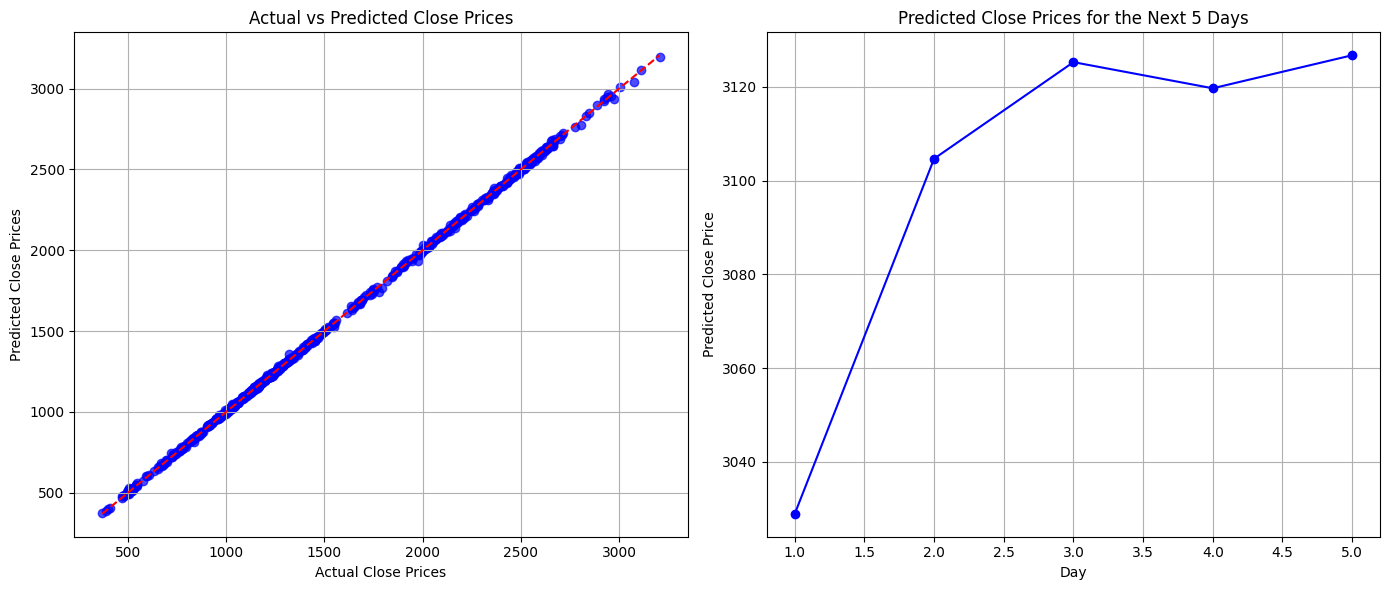

In [ ]:
# Plotting
plt.figure(figsize=(14, 6))

# Subplot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.grid(True)

# Subplot 2: Next 5 Days Prediction
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 6), future_pred, marker='o', linestyle='-', color='blue')
plt.xlabel('Day')
plt.ylabel('Predicted Close Price')
plt.title('Predicted Close Prices for the Next 5 Days')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Since standard Linear Regression does not have hyperparameters, we'll proceed directly with training and evaluating it.


# Algorithm 2- Long Short-Term Memory Networks (LSTM)

In [124]:
from sklearn.preprocessing import MinMaxScaler

# Select the column(s) for analysis
data1 = df1[['Close']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data1)

# Create sequences
def create_sequences(data1, sequence_length):
    sequences = []
    for i in range(len(data1) - sequence_length):
        sequences.append(data1[i:i + sequence_length])
    return np.array(sequences)

sequence_length = 50  # Example sequence length
sequences = create_sequences(scaled_data, sequence_length)


In [125]:
split_ratio = 0.8
split_index = int(len(sequences) * split_ratio)
train_sequences = sequences[:split_index]
test_sequences = sequences[split_index:]

X_train = train_sequences[:, :-1]
y_train = train_sequences[:, -1]
X_test = test_sequences[:, :-1]
y_test = test_sequences[:, -1]


In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(50))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0285 - val_loss: 5.2721e-04
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 5.4032e-04 - val_loss: 5.1969e-04
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 4.2945e-04 - val_loss: 7.0476e-04
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 4.8319e-04 - val_loss: 4.6829e-04
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 4.1464e-04 - val_loss: 4.8151e-04
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 3.9822e-04 - val_loss: 3.7622e-04
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 4.5191e-04 - val_loss: 6.2686e-04
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 3.9290e-04 - val_loss: 3.4888e-04
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 3.5170e-04 - val_loss: 3.2532e-04
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 3.4523e-04 - val_loss: 6.5539e-04


In [127]:
# Make predictions
predictions = model2.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the true values for comparison
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [128]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test_rescaled, predictions)
mse = mean_squared_error(y_test_rescaled, predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 73.88014584566979
Mean Squared Error (MSE): 20308.585014572458
Root Mean Squared Error (RMSE): 142.508192798072


# Performing Hyperparameter tuning

In [ ]:
!pip install keras-tuner -q
from keras_tuner import HyperModel
from keras_tuner import RandomSearch

# Select the relevant columns
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data = df1[columns]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

sequence_length = 50  # Example sequence length
sequences = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(sequences) * split_ratio)
train_sequences = sequences[:split_index]
test_sequences = sequences[split_index:]

X_train = train_sequences[:, :-1]
y_train = train_sequences[:, -1, 3]  # Assuming 'Close' is the 4th column
X_test = test_sequences[:, :-1]
y_test = test_sequences[:, -1, 3]

# Define the HyperModel class
class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model2 = Sequential()
        model2.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                        return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model2.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32)))
        model2.add(Dense(1))

        model2.compile(optimizer='adam', loss='mean_squared_error')
        return model2

# Initialize the tuner
hypermodel = LSTMHyperModel()

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='lstm_tuning',
    project_name='tcs_lstm'
)

# Perform the search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Retrieve the best model
best_model2 = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters: {best_hyperparameters.values}")

# Make predictions with the best model
predictions = best_model2.predict(X_test)

# Reshape predictions to 2D array for inverse scaling
predictions = predictions.reshape(-1, 1)

# Inverse scale the predictions
# Construct an array with the required shape for inverse scaling
predictions = scaler.inverse_transform(np.concatenate((np.zeros((predictions.shape[0], 3)), predictions, np.zeros((predictions.shape[0], 1))), axis=1))[:, 3]


In [ ]:
# The hyperparameter search is complete in Jupyter notebook and below are best parameters
Optimal number of units in the first LSTM layer: 32
Optimal dropout rate for the first LSTM layer: 0.0
Optimal number of units in the second LSTM layer: 32
Optimal dropout rate for the second LSTM layer: 0.4
Optimal learning rate for the optimizer: 0.01

## Rerunning LSTM with best parameters

In [129]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df1 is your DataFrame and already loaded
# df1 = pd.read_csv('your_data.csv')

# Convert 'Date' to datetime format and drop non-numeric columns
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df2 = df1.drop(columns=['Date', 'Symbol', 'Series', 'Trades','%Deliverble','Last'])

# Splitting the data into training and testing sets
split_index = int(0.8 * len(df2))
train_data = df2.iloc[:split_index]
test_data = df2.iloc[split_index:]

# Scaling the 'Close' column
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

# Creating the dataset with 60 timesteps for training
X_train = []
y_train = []
for i in range(60, len(scaled_train_data)):
    X_train.append(scaled_train_data[i-60:i, 0])
    y_train.append(scaled_train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Creating the dataset with 60 timesteps for testing
X_test = []
y_test = []
for i in range(60, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-60:i, 0])
    y_test.append(scaled_test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping the data to 3D
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the model with the optimal hyperparameters
model2 = Sequential()
model2.add(Input(shape=(X_train.shape[1], 1)))
model2.add(LSTM(units=32, return_sequences=True))
model2.add(Dropout(0.0))
model2.add(LSTM(units=32, return_sequences=False))
model2.add(Dropout(0.4))
model2.add(Dense(1))

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Training the model
history = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Making predictions
predictions2 = model2.predict(X_test)

# Inverse transform the predictions
predictions2 = scaler.inverse_transform(predictions2)

# Inverse transform the true values for comparison
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test_rescaled, predictions2)
mse = mean_squared_error(y_test_rescaled, predictions2)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0299 - val_loss: 0.0056
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0028 - val_loss: 5.8557e-04
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0023 - val_loss: 4.4684e-04
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0019 - val_loss: 4.0918e-04
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0019 - val_loss: 5.9053e-04
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0019 - val_loss: 4.2564e-04
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0017 - val_loss: 6.4793e-04
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#Result before Hyperparameter tuning

Mean Absolute Error (MAE): 73.88014584566979
Mean Squared Error (MSE): 20308.585014572458
Root Mean Squared Error (RMSE): 142.508192798072


#Result after Hyper Parameter tuning

Mean Absolute Error (MAE): 36.59846595128379
Mean Squared Error (MSE): 6045.970727421438
Root Mean Squared Error (RMSE): 77.75584047144908

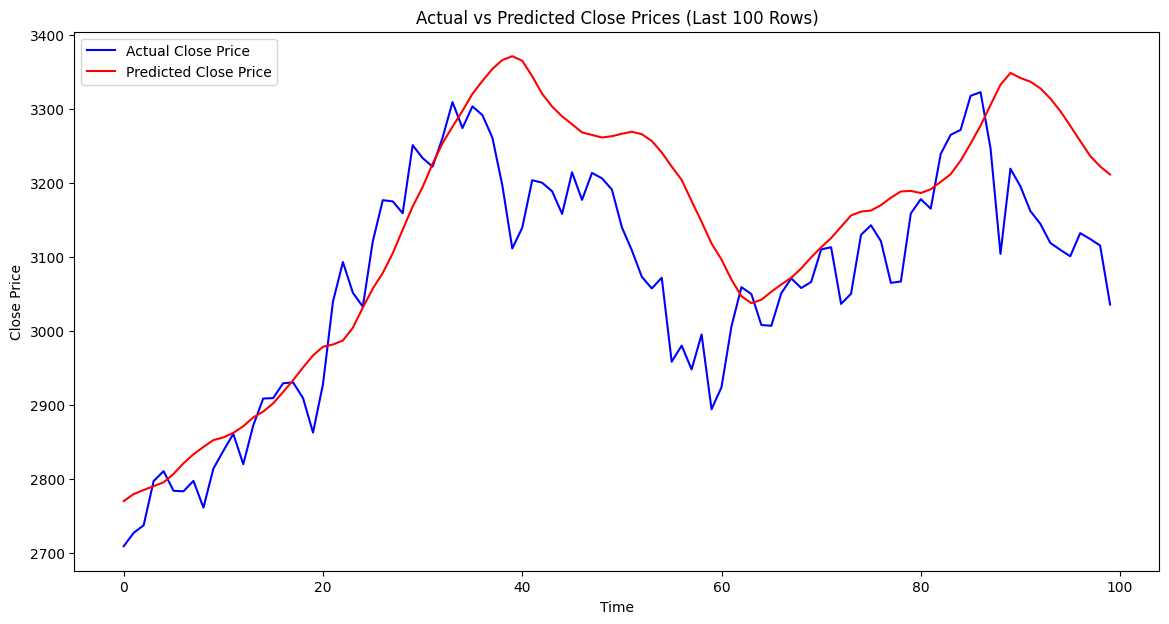

In [131]:
# Visualize the actual vs predicted 'Close' values
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled[-100:], label='Actual Close Price', color='blue')
plt.plot(predictions[-100:], label='Predicted Close Price', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Last 100 Rows)')
plt.legend()
plt.show()

# Algorithm 3- Random forest Regression


In [132]:
# Extract features and target variable
X = df2.drop(columns=['Close'])  # 'Close' is the target column
y = df2['Close']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model with the given parameters
params = {
    'n_estimators': 500,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 90,
    'bootstrap': True}

# Initialize the model
rf_regressor = RandomForestRegressor(**params)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred3 = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 8.800539734299436
Mean Squared Error (MSE): 171.0253856721125
Root Mean Squared Error (RMSE): 77.75584047144908


## Performing Hyper parameter tuning for the Model

In [ ]:
# Select the features and target variable
# Assuming the relevant features are all columns except 'Date' and 'Close'
X = df.drop(columns=['Date', 'Close'])
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [int(x) for x in range(100, 1001, 100)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in range(10, 111, 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize the RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random.best_params_

# Train the Random Forest Regressor with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_best = best_rf.predict(X_test)

# Evaluate the model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

best_params, mae_best, mse_best, r2_best

In [ ]:
#Got best parameter as below in jupyter notebook
{'n_estimators': 500,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'auto',
  'max_depth': 90,
  'bootstrap': True},


# Rerun Random forest with best parameter

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Convert 'Date' to datetime format and drop non-numeric columns
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df2 = df1.drop(columns=['Date', 'Symbol', 'Series', 'Trades'])

# Separate features and target variable
X = df2.drop(columns=['Close'])
y = df2['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with the given parameters
params = {
    'n_estimators': 500,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 90,
    'bootstrap': True
}

# Initialize and train the Random Forest Regressor
model31 = RandomForestRegressor(**params)
model31.fit(X_train, y_train)

# Make predictions on the test set
y_pred31 = model31.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred31)
mae = mean_absolute_error(y_test, y_pred31)
rmse = math.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 4.668009541062794
MSE: 49.847253720109
RMSE: 7.0602587573055


In [ ]:
# Result Before Hyper Parameter tuning

Mean Absolute Error (MAE): 8.800539734299436
Mean Squared Error (MSE): 171.0253856721125
Root Mean Squared Error (RMSE): 77.75584047144908

# Result after Hyper Parameter tuning

MAE: 4.668009541062794
MSE: 49.847253720109
RMSE: 7.0602587573055

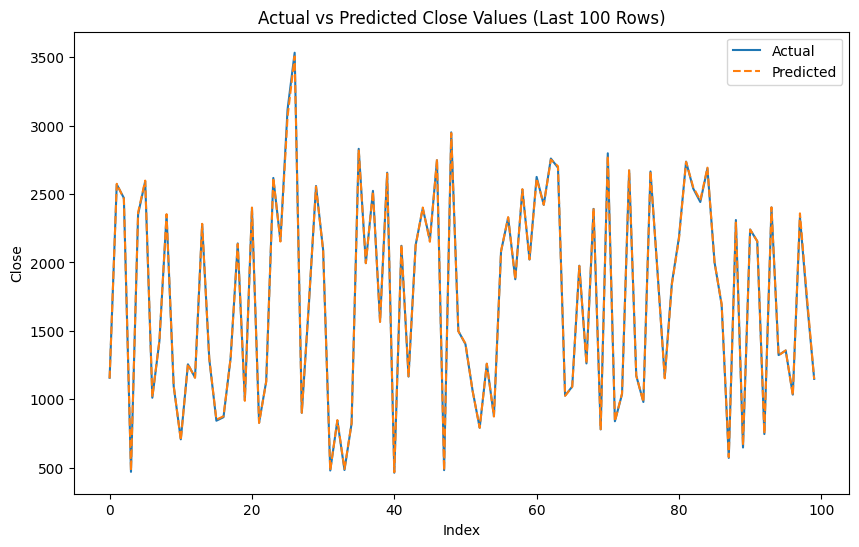

In [137]:
# Visualize the actual and predicted 'Close' values for the last 100 rows
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[-100:], label='Actual')
plt.plot(y_pred31[-100:], label='Predicted', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Close')
plt.title('Actual vs Predicted Close Values (Last 100 Rows)')
plt.legend()
plt.show()

 # Algorithm 4- Support Vector Regression

In [138]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'Date' to datetime format and drop non-numeric columns
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df2 = df1.drop(columns=['Date', 'Symbol', 'Series', 'Trades'])

# Separate features and target variable
X = df2.drop(columns=['Close'])
y = df2['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all data is numeric
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = pd.to_numeric(df2[col], errors='coerce')
        df2[col].fillna(df2[col].median(), inplace=True)

# Separate features and target variable
X = df2.drop(columns=['Close'])
y = df2['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
# Train the SVR model
model4 = SVR(kernel='rbf')
model4.fit(X_train_scaled, y_train)


SVR()

In [140]:
# Make predictions
y_pred = model4.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 187.4782730074582
MSE: 100011.13791186023
RMSE: 316.24537611143063


#Performing Hyper parameter tuning for the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Extract features and target variable
X = df2.drop(columns=['Close'])
y = df2['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5]
}

# Initialize the SVR model
model = SVR()

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE) with Best Model: {mse}")
print(f"R² Score with Best Model: {r2}")

In [ ]:
# Performed hyper parameter tuning in Jupyter Notebook and got best parameters
Best Hyperparameters: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

##Rerun SVR with best Parameters

In [ ]:
  # Ensure all data is numeric
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = pd.to_numeric(df2[col], errors='coerce')
        df2[col].fillna(df2[col].median(), inplace=True)

# Drop rows with NaN values in the target variable 'Close'
df2.dropna(subset=['Close'], inplace=True)

# Extract features and target variable
X = df2.drop(columns=['Close'])
y = df2['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rerun SVR with the best hyperparameters
best_params = {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
best_model = SVR(**best_params)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) with Best Model: {mae}")
print(f"Mean Squared Error (MSE) with Best Model: {mse}")
print(f"R² Score with Best Model: {r2}")


Mean Absolute Error (MAE) with Best Model: 3.3783281104808007
Mean Squared Error (MSE) with Best Model: 23.518017971617656
R² Score with Best Model: 0.9999542039635003


In [ ]:
# Result Before Hyper Parameter tuning

MAE: 187.4782730074582
MSE: 100011.13791186023
RMSE: 316.24537611143063

# Result after Hyper Parameter tuning

Mean Absolute Error (MAE) with Best Model: 3.3783281104808007
Mean Squared Error (MSE) with Best Model: 23.518017971617656
R² Score with Best Model: 0.9999542039635003

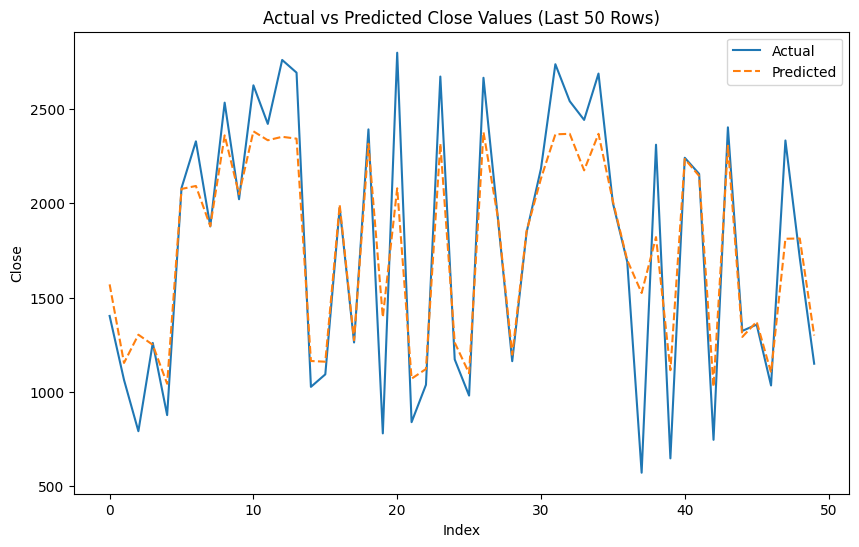

In [141]:
# Plot actual vs predicted 'Close' values for the last 50 rows
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[-50:], label='Actual')
plt.plot(y_pred[-50:], label='Predicted', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Close')
plt.title('Actual vs Predicted Close Values (Last 50 Rows)')
plt.legend()
plt.show()

# 5- ARIMA MODEL

ADF Statistic: -1.6454979007348989
p-value: 0.45938944755183037


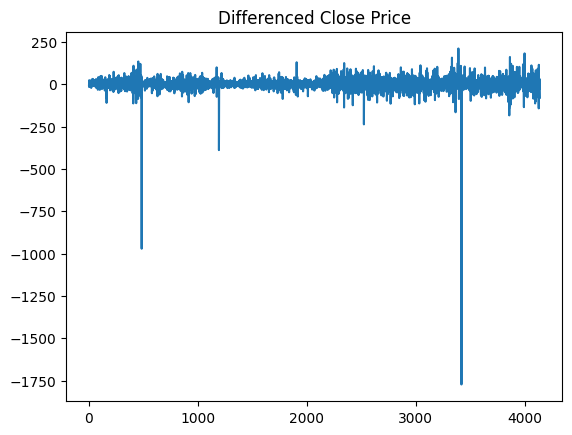

                               SARIMAX Results                                
Dep. Variable:                 Trades   No. Observations:                 2456
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -29290.153
Date:                Sat, 10 Aug 2024   AIC                          58592.306
Time:                        11:05:52   BIC                          58627.141
Sample:                             0   HQIC                         58604.965
                               - 2456                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5664      0.013    -44.551      0.000      -0.591      -0.541
ar.L2         -0.4216      0.014    -29.172      0.000      -0.450      -0.393
ar.L3         -0.3156      0.013    -23.822      0.0

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Check for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the series is non-stationary, we need to difference it
df2['Close_diff'] = df2['Close'].diff().dropna()

# Plotting the differenced series
df2['Close_diff'].plot()
plt.title('Differenced Close Price')
plt.show()

# Fit the ARIMA model
# Here, we choose (p, d, q) as (5, 1, 0) for example purposes
model5 = ARIMA(df2['Close'], order=(5, 1, 0))
model5_fit = model5.fit()
print(model_fit.summary())

# Make predictions
predictions = model5_fit.predict(start=len(df)-30, end=len(df)-1, typ='levels')

# Evaluate the model
y_true = df['Close'][-30:]
y_pred = predictions

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


## Performing Hyperparameter Tuning

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import warnings

warnings.filterwarnings("ignore")


# Differencing to make the series stationary if necessary
df2['Close_diff'] = df2['Close'].diff().dropna()

# Parameter ranges for grid search
p = range(0, 6)
d = range(0, 2)
q = range(0, 6)

# Create a list with all possible combinations of p, d, and q
pdq_combinations = list(itertools.product(p, d, q))

# Define a function to evaluate each ARIMA model
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]

    history = [x for x in train]
    predictions = list()

    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    mse = mean_squared_error(test, predictions)
    return mse

# Perform grid search
best_score, best_cfg = float("inf"), None
for param in pdq_combinations:
    try:
        mse = evaluate_arima_model(df['Close'].values, param)
        if mse < best_score:
            best_score, best_cfg = mse, param
        print(f'ARIMA{param} MSE={mse}')
    except Exception as e:
        print(f'ARIMA{param} failed with exception: {e}')

print(f'Best ARIMA{best_cfg} MSE={best_score}')

# Fit the best ARIMA model
best_model = ARIMA(df['Close'], order=best_cfg)
best_model_fit = best_model.fit()

# Make predictions
predictions = best_model_fit.predict(start=len(df)-30, end=len(df)-1, typ='levels')

# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Close'][-60:], label='Actual Close Prices')
plt.plot(predictions, color='red', label='Predicted Close Prices')
plt.legend()
plt.show()

# Evaluate the best model
y_true = df2['Close'][-30:]
y_pred = predictions

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


In [ ]:
#Performed HPT in Jupyter notebook and arrived at best Parameter
Best ARIMA(2, 1, 0) MSE=5477.131071617789

# Rerunning Arima with best Parameters

ADF Statistic: -1.6454979007348989
p-value: 0.45938944755183037


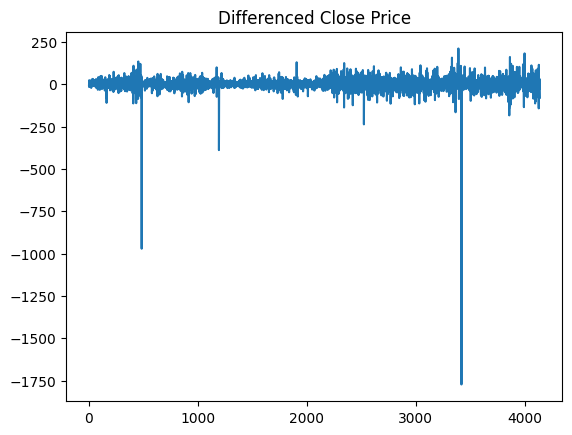

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4139
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -21538.794
Date:                Sat, 10 Aug 2024   AIC                          43083.588
Time:                        06:29:24   BIC                          43102.572
Sample:                             0   HQIC                         43090.306
                               - 4139                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0005      0.023     -0.023      0.982      -0.046       0.045
ar.L2         -0.0252      0.018     -1.392      0.164      -0.061       0.010
sigma2      1944.5892      2.550    762.528      0.0

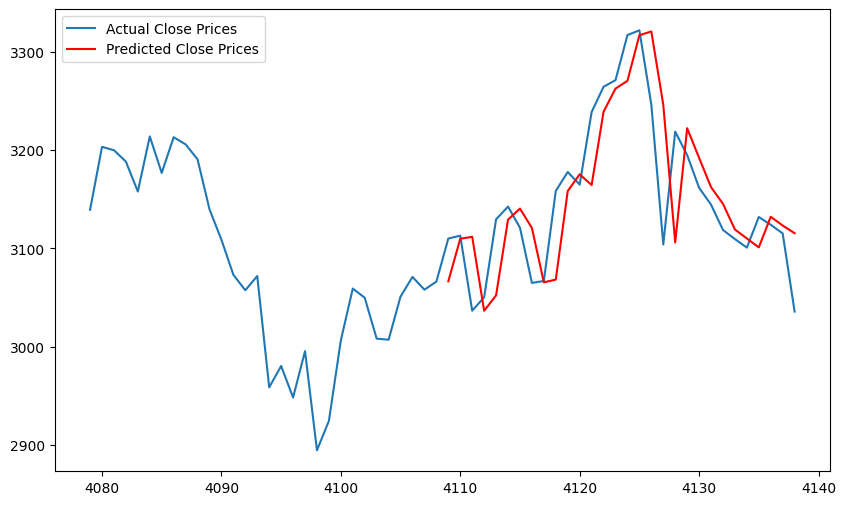

Mean Absolute Error (MAE): 38.73500262753596
Mean Squared Error (MSE): 2783.508704975298
Root Mean Squared Error (RMSE): 52.75896800521498


In [ ]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller

# Assuming df2 is already defined and contains a 'Close' column
result = adfuller(df2['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the series is non-stationary, we need to difference it
df2['Close_diff'] = df2['Close'].diff().dropna()

# Plotting the differenced series
df2['Close_diff'].plot()
plt.title('Differenced Close Price')
plt.show()

# Fit the ARIMA model with (2, 1, 0)
model210 = ARIMA(df2['Close'], order=(2, 1, 0))
model210_fit = model210.fit()
print(model210_fit.summary())

# Make predictions
predictions = model210_fit.predict(start=len(df2)-30, end=len(df2)-1, typ='levels')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df2['Close'][-60:], label='Actual Close Prices')
plt.plot(predictions, color='red', label='Predicted Close Prices')
plt.legend()
plt.show()

# Evaluate the model
y_true = df2['Close'][-30:]
y_pred = predictions

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


In [ ]:
# Result Before Hyper Parameter tuning

Mean Absolute Error (MAE): 39.12206096631917
Mean Squared Error (MSE): 2803.196351135012
Root Mean Squared Error (RMSE): 52.945220286018376

# Result after Hyper Parameter tuning

Mean Absolute Error (MAE): 38.73500262753596
Mean Squared Error (MSE): 2783.508704975298
Root Mean Squared Error (RMSE): 52.75896800521498

In [ ]:
# Following are the evaluation results for the 4 algorithms

# 1 Linear Regression
Mean Absolute Error (MAE): 5.817241764759123
Mean Squared Error (MSE): 65.68327428089903
R-squared (R²): 0.9998566371302617

# 2 LSTM
Mean Absolute Error (MAE): 36.59846595128379
Mean Squared Error (MSE): 6045.970727421438
Root Mean Squared Error (RMSE): 77.75584047144908

# 3 Random forest Regression

MAE: 4.668009541062794
MSE: 49.847253720109
RMSE: 7.0602587573055

# 4 Support Vector Regression

Mean Absolute Error (MAE): 3.3783281104808007
Mean Squared Error (MSE): 23.518017971617656
R² Score: 0.9999542039635003

 #5 ARIMA MODEL
Mean Absolute Error (MAE): 38.73500262753596
Mean Squared Error (MSE): 2783.508704975298
Root Mean Squared Error (RMSE): 52.75896800521498


In [ ]:
# Based on the evaluation metrics provided, the best model among the ones listed appears to be Support Vector Regression (SVR). Here’s why:

Mean Absolute Error (MAE): SVR has the lowest MAE of 3.3783, indicating it has the smallest average error across predictions.
Mean Squared Error (MSE): SVR also has the lowest MSE of 23.5180, which shows that the variance of the errors is the smallest.
R-squared (R²): SVR has the highest R² score of 0.99995, which indicates that the model explains almost all the variability of the target variable around its mean.
Given these metrics, Support Vector Regression outperforms the other models in terms of accuracy and error minimization.

# 5 Web application Development

In [144]:
# Install required packages
!pip install streamlit pandas scikit-learn pyngrok joblib

In [145]:
import joblib
import os
import subprocess
from pyngrok import ngrok
from pyngrok.exception import PyngrokNgrokHTTPError

# Save the model to a file
joblib.dump(best_model, 'svr_stock_prediction.joblib')
print("Model saved successfully.")

Model saved successfully.


In [146]:
# Set your ngrok auth token
ngrok.set_auth_token("2h00v7VtkuX5Dhvyvy0yVQNPloU_kjWFh1yBEhpJyJJ6rxqt")

In [147]:
# Streamlit app code as a string
app_code = """
import streamlit as st
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def main():
    st.title("SVR Stock Price Prediction")

    # File upload
    uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        st.write("Dataset Overview:")
        st.write(df.head())

        # Select the relevant features and target variable
        features = df.drop(columns=['Date', 'Close','Symbol', 'Series', 'Trades'])
        target = df['Close']

        # Identify numeric and categorical columns
        numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns
        categorical_cols = features.select_dtypes(include=['object']).columns

        # Create a preprocessing pipeline
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())  # Standardizing numeric features
        ])

        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute categorical with the most frequent value
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_cols),
                ('cat', categorical_transformer, categorical_cols)
            ])

        # Apply the preprocessing pipeline
        X_processed = preprocessor.fit_transform(features)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_processed, target, test_size=0.2, random_state=42)

        # Initialize the SVR model with default parameters
        svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

        # Train the model
        svr_model.fit(X_train, y_train)

        # Make predictions on the test set using the model
        y_pred = svr_model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        st.subheader("SVR Model Evaluation:")
        st.write(f"Mean Absolute Error (MAE): {mae:.2f}")
        st.write(f"Mean Squared Error (MSE): {mse:.2f}")
        st.write(f"R-squared (R²): {r2:.2f}")

        # Predict close prices for the next 5 days (if applicable)
        if len(df) >= 5:
            last_5_days_df = df.tail(5).drop(columns=['Close'])
            last_5_days_processed = preprocessor.transform(last_5_days_df)
            future_pred = svr_model.predict(last_5_days_processed)

            st.subheader("Predicted Close Prices for the Next 5 Days:")
            for i, pred in enumerate(future_pred, start=1):
                st.write(f"Day {i}: {pred:.2f}")

if __name__ == "__main__":
    main()




"""

In [149]:
# Write the Streamlit app code to a file
app_path = "/content/svr.py"
with open(app_path, "w") as f:
    f.write(app_code)

In [152]:
# Function to run Streamlit
def run_streamlit():
    # Start the Streamlit server on the default port 8501
    subprocess.Popen(["streamlit", "run", app_path])

    try:
        # Connect to the Streamlit server using ngrok
        url = ngrok.connect(8501)
        print(f"Streamlit app is live at {url}")
    except PyngrokNgrokHTTPError as e:
        if "failed to start tunnel" in str(e) and "more than 3 tunnels" in str(e):
            print("Ngrok tunnel limit reached. Please terminate some existing tunnels and try again.")
        else:
            raise


# Execute the function
if __name__ == "__main__":
    run_streamlit()

Streamlit app is live at NgrokTunnel: "https://d625-34-27-126-2.ngrok-free.app" -> "http://localhost:8501"
